## Statistical analysis and hypothesis testing

In order to test our hypotheses we need to choose the appropriate statistical tests and determine if the relationships are statistically significant

### Import libraries

In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import scipy.stats as stats

### Load the clean data ready for analysis

In [2]:
df = pd.read_csv('../data/clean-agriculturedata.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,Brazil,South East,Rice,2.64,514.15,21.96,0.639,4,15.95,25.39,42.58,85.01,Drought-resistant Crops,116.07
1,1995,India,Punjab,Vegetables,13.98,1940.83,6.11,4.100,6,74.79,33.24,74.95,96.05,Drought-resistant Crops,1026.14
2,1996,Brazil,South,Rice,34.76,247.44,8.42,2.520,2,52.69,6.56,10.86,56.99,Water Management,837.28
3,1994,China,Central,Corn,19.10,2042.70,4.88,1.520,8,93.98,42.48,52.78,65.33,No Adaptation,369.90
4,2018,Nigeria,North Central,Vegetables,-2.34,2716.87,23.37,1.593,6,22.09,41.06,8.44,99.04,Drought-resistant Crops,555.35


### Hypothesis 1: Soil Health Drives Economic Productivity

Soil health is key for optimal crop yeilds as plants gain key nutrients from the [soil such as Nitrogen, Phosphorus and Potash](https://www.yara.co.uk/grow-the-future/sustainable-farming/soil-health/). We predict that high soil health will be reflectect in economic growth.

#### Checking the distribution of the varaibles to choose the right statistical test

##### density plot to check the distributions

##### Soil Health

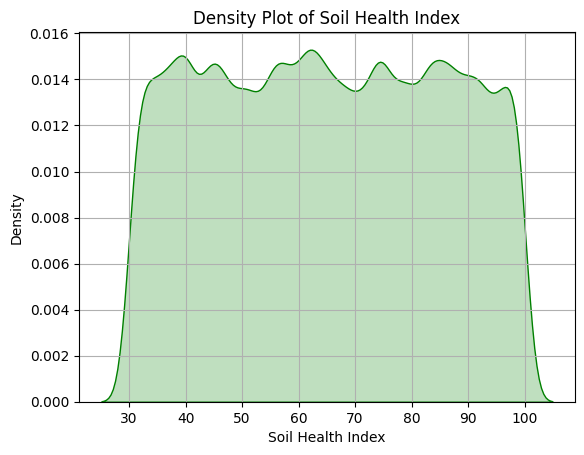

In [ ]:
sns.kdeplot(data=df, x='Soil_Health_Index', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of Soil Health Index')
plt.xlabel('Soil Health Index')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Soil health seems to be a near uniform distribution with only slight ups and downs.

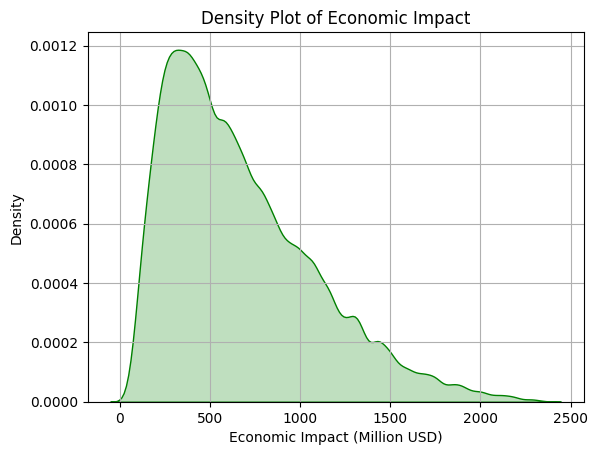

In [ ]:
sns.kdeplot(data=df, x='Economic_Impact_Million_USD', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of Economic Impact')
plt.xlabel('Economic Impact (Million USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

economic impact is also not normally distributed with a large degree of asymmetry towards lower values

As they are not normally distributed we will use a non parametric test.

#### Spearman Correlation Coefficient for soil heath index and economic impact

In [14]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df['Economic_Impact_Million_USD'], df['Soil_Health_Index']) #This code was created with help from co-pilot
print(f"Spearman correlation coefficient: {rho:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation coefficient: -0.009
P-value: 0.410
